In [1]:
#BISMILLAHIRROHMANIRROHIM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bit = pd.read_csv('/content/Health_AnimalBites.csv')
bit.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [5]:
#menghapus kolom tak perlu
bit = bit.drop(columns=['vaccination_yrs','victim_zip','AdvIssuedYNDesc','quarantine_date',
                        'DispositionIDDesc','head_sent_date','release_date'])
bit.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1985-06-20 00:00:00,BODY,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,BODY,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,BODY,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,BODY,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,BODY,UNKNOWN


In [6]:
#to date time
bit['bite_date'] = bit['bite_date'].replace(['5013-07-15 00:00:00'],'2013-07-15 00:00:00')
bit['bite_date'] = pd.to_datetime(bit['bite_date'])
bit['vaccination_date'] = pd.to_datetime(bit['vaccination_date'])

In [7]:
#cleaning data nan
bit['SpeciesIDDesc'] = bit['SpeciesIDDesc'].fillna('OTHER')
bit['BreedIDDesc'] = bit['BreedIDDesc'].fillna('UNKNOWN')
bit['GenderIDDesc'] = bit['GenderIDDesc'].fillna('UNKNOWN')
bit['color'] = bit['color'].fillna('UNKNOWN')
bit['WhereBittenIDDesc'] = bit['WhereBittenIDDesc'].fillna('UNKNOWN')
bit['ResultsIDDesc'] = bit['ResultsIDDesc'].fillna('UNKNOWN')

In [8]:
#mengubah ke huruf kecil
bit['SpeciesIDDesc'] = bit['SpeciesIDDesc'].str.lower()
bit['BreedIDDesc'] = bit['BreedIDDesc'].str.lower()
bit['GenderIDDesc'] = bit['GenderIDDesc'].str.lower()
bit['color'] = bit['color'].str.lower()
bit['WhereBittenIDDesc'] = bit['WhereBittenIDDesc'].str.lower()
bit['ResultsIDDesc'] = bit['ResultsIDDesc'].str.lower()

In [9]:
#menghapus seluruh duplikasi baris
bit.drop_duplicates(inplace=True)
bit

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
0,1985-05-05,dog,unknown,female,lig. brown,1985-06-20,body,unknown
1,1986-02-12,dog,unknown,unknown,bro & bla,NaT,body,unknown
2,1987-05-07,dog,unknown,unknown,unknown,NaT,body,unknown
3,1988-10-02,dog,unknown,male,bla & bro,NaT,body,unknown
4,1989-08-29,dog,unknown,female,blk-wht,NaT,body,unknown
...,...,...,...,...,...,...,...,...
8998,2017-09-05,dog,unknown,unknown,unknown,NaT,unknown,unknown
8999,2017-09-07,dog,pomeranian,male,red,NaT,head,unknown
9000,2017-09-07,dog,labrador retriv,male,brown,NaT,unknown,unknown
9001,2017-09-07,dog,labrador retriv,female,blk wht,NaT,body,unknown


In [10]:
bit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642 entries, 0 to 9002
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8536 non-null   datetime64[ns]
 1   SpeciesIDDesc      8642 non-null   object        
 2   BreedIDDesc        8642 non-null   object        
 3   GenderIDDesc       8642 non-null   object        
 4   color              8642 non-null   object        
 5   vaccination_date   4107 non-null   datetime64[ns]
 6   WhereBittenIDDesc  8642 non-null   object        
 7   ResultsIDDesc      8642 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 607.6+ KB


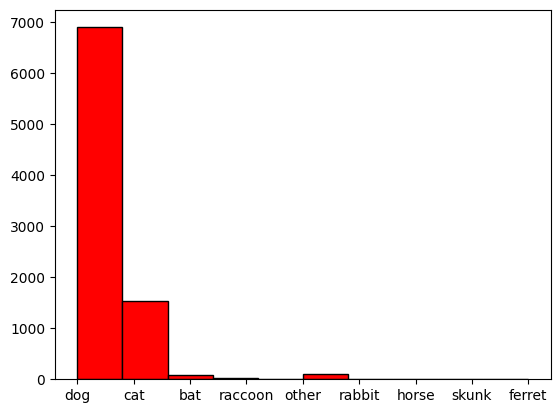

In [11]:
#jumlah banyak kasus gigitan hewan
x = bit['SpeciesIDDesc']
plt.hist(x, bins=10, color='red', edgecolor='black')
plt.show()

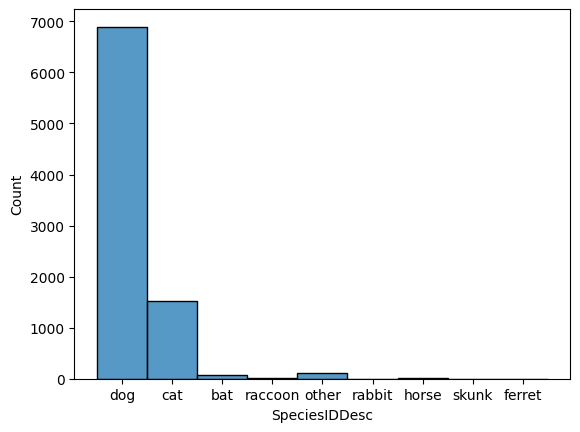

In [12]:
sns.histplot(x='SpeciesIDDesc', data=bit)
plt.show()

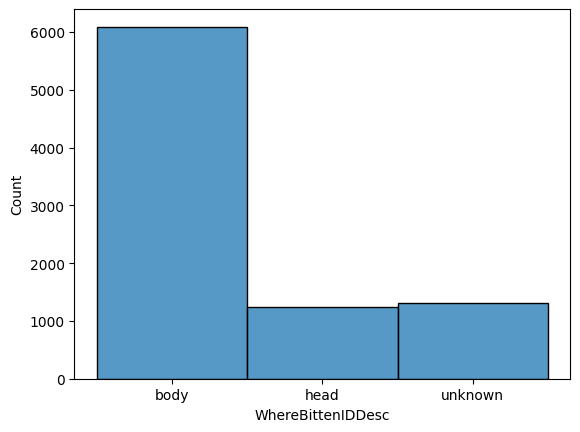

In [13]:
sns.histplot(data=bit, x='WhereBittenIDDesc')
plt.show()

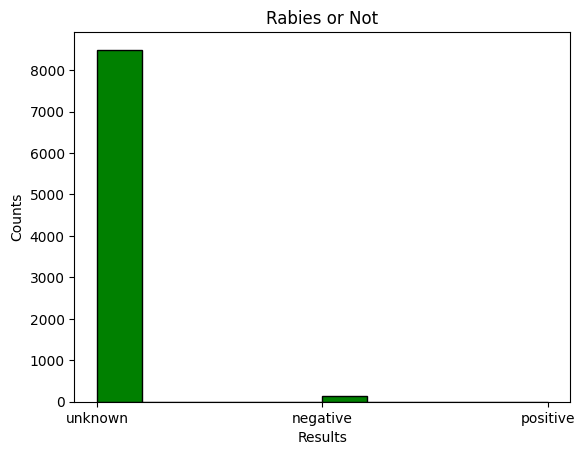

In [14]:
plt.hist(bit['ResultsIDDesc'], bins=10, color='green', edgecolor='black')
plt.title('Rabies or Not')
plt.xlabel('Results')
plt.ylabel('Counts')
plt.show()

In [15]:
rabies = bit.groupby('ResultsIDDesc')
positive = rabies.get_group('positive')
positive

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
1418,2015-05-05,bat,unknown,unknown,unknown,NaT,unknown,positive
1502,2017-04-29,dog,great pyreneese,female,white,NaT,unknown,positive
1677,NaT,bat,unknown,unknown,unknown,NaT,unknown,positive


In [16]:
animal = bit.groupby('SpeciesIDDesc')

In [17]:
dog = animal.get_group('dog')
dog

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
0,1985-05-05,dog,unknown,female,lig. brown,1985-06-20,body,unknown
1,1986-02-12,dog,unknown,unknown,bro & bla,NaT,body,unknown
2,1987-05-07,dog,unknown,unknown,unknown,NaT,body,unknown
3,1988-10-02,dog,unknown,male,bla & bro,NaT,body,unknown
4,1989-08-29,dog,unknown,female,blk-wht,NaT,body,unknown
...,...,...,...,...,...,...,...,...
8998,2017-09-05,dog,unknown,unknown,unknown,NaT,unknown,unknown
8999,2017-09-07,dog,pomeranian,male,red,NaT,head,unknown
9000,2017-09-07,dog,labrador retriv,male,brown,NaT,unknown,unknown
9001,2017-09-07,dog,labrador retriv,female,blk wht,NaT,body,unknown


In [18]:
raccoon = animal.get_group('raccoon')
raccoon

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
255,2010-03-25,raccoon,unknown,unknown,unknown,NaT,body,unknown
279,2010-04-02,raccoon,unknown,unknown,unknown,NaT,body,unknown
1358,2011-03-18,raccoon,unknown,unknown,unknown,NaT,body,negative
1411,2014-11-04,raccoon,unknown,unknown,unknown,NaT,body,negative
1453,2016-02-15,raccoon,unknown,unknown,unknown,NaT,body,negative
1466,2016-06-24,raccoon,unknown,unknown,unknown,NaT,body,negative
1510,2017-08-14,raccoon,unknown,unknown,unknown,NaT,body,unknown
1536,NaT,raccoon,unknown,unknown,unknown,NaT,unknown,negative
1889,2011-05-18,raccoon,unknown,unknown,unknown,NaT,body,unknown
1993,2011-06-18,raccoon,unknown,unknown,unknown,NaT,body,unknown


In [19]:
ferret = animal.get_group('ferret')
ferret

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
6213,2015-01-01,ferret,unknown,unknown,unknown,2015-01-27,body,unknown
8093,2016-11-06,ferret,unknown,unknown,gray,2016-11-29,unknown,unknown
8402,2017-04-09,ferret,unknown,female,unknown,NaT,body,unknown
8577,2017-05-26,ferret,unknown,unknown,blk wht,NaT,unknown,unknown


In [20]:
breed_dog = bit[bit['SpeciesIDDesc']=='dog']
breed_dog

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
0,1985-05-05,dog,unknown,female,lig. brown,1985-06-20,body,unknown
1,1986-02-12,dog,unknown,unknown,bro & bla,NaT,body,unknown
2,1987-05-07,dog,unknown,unknown,unknown,NaT,body,unknown
3,1988-10-02,dog,unknown,male,bla & bro,NaT,body,unknown
4,1989-08-29,dog,unknown,female,blk-wht,NaT,body,unknown
...,...,...,...,...,...,...,...,...
8998,2017-09-05,dog,unknown,unknown,unknown,NaT,unknown,unknown
8999,2017-09-07,dog,pomeranian,male,red,NaT,head,unknown
9000,2017-09-07,dog,labrador retriv,male,brown,NaT,unknown,unknown
9001,2017-09-07,dog,labrador retriv,female,blk wht,NaT,body,unknown


In [21]:
count_breed_dog = pd.DataFrame(breed_dog['BreedIDDesc'].value_counts())
count_breed_dog

,BreedIDDesc
unknown,3163
pit bull,1087
germ shepherd,325
labrador retriv,252
boxer,181
...,...
red heeler,1
briard,1
chocolate lab.,1
old eng shp dog,1


In [22]:
cat = bit[bit['SpeciesIDDesc']=='cat']
cat

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_date,WhereBittenIDDesc,ResultsIDDesc
20,1992-03-18,cat,unknown,unknown,unknown,NaT,head,unknown
28,1993-04-06,cat,unknown,unknown,unknown,NaT,body,unknown
40,2009-10-29,cat,unknown,female,gray,NaT,body,unknown
52,2009-12-31,cat,unknown,male,white,2010-01-14,body,unknown
57,2010-01-02,cat,unknown,female,unknown,NaT,body,unknown
...,...,...,...,...,...,...,...,...
8972,2017-08-31,cat,unknown,male,unknown,NaT,head,unknown
8974,2017-08-30,cat,unknown,male,unknown,NaT,body,unknown
8975,2017-08-29,cat,unknown,unknown,unknown,NaT,body,unknown
8984,2017-09-02,cat,unknown,unknown,unknown,NaT,unknown,unknown


In [23]:
count_breed_cat = pd.DataFrame(cat['BreedIDDesc'].value_counts())
count_breed_cat

,BreedIDDesc
unknown,1525
other,2
beagle,1
